In [3]:
import numpy as np
import pandas as pd
import h5py
import os

import matplotlib.pyplot as plt

#### Sample usage

In [4]:
# # Create a dictionary storing NumPy arrays
# data = np.random.random(size = 4)
# label = np.random.random(size = 4)

# # Open HDF5 file and write in the data
# data_path = 'data/tmp.hdf5'
# f = h5py.File(data_path, 'w')
# f.create_dataset('data', data=data)
# f.create_dataset('labels', data=label)
# f.close()

In [5]:
# # Re-open HDF5 file and read out the data
# f = h5py.File(data_path, "r")
# data = np.array(f['data'])
# label = np.array(f['labels'])
# f.close()

# print(np.shape(data))
# print(np.shape(label))

In [6]:
# # Remove temporary data file
# if os.path.isfile(data_path): os.remove(data_path)

#### Slice the data for training, validation, and testing

In [5]:
# Dataset reference: https://arxiv.org/pdf/2201.07284.pdf
data_root = '../../../Prior/TS_analysis/Datasets/Public/multivariate/SMD/ServerMachineDataset/'
sel_feats = ['value-' + str(i) for i in range(38)]
lab_col = 'is_anomaly'

In [6]:
## For training and validation data
tr_num, val_num = 1000, 500
datasets = ['machine-1-1', 'machine-2-1', 'machine-3-2', 'machine-3-7']

for dataset in datasets: 
    # Load the data
    tmp_path = data_root + 'train/' + dataset + '.txt'
    tmp_df = pd.read_csv(tmp_path, header=None)
    tmp_df.columns = sel_feats
    tmp_df[lab_col] = 0
    
    # Slice the data and label
    # val_data = np.array(tmp_df[sel_feats].iloc[-val_num:])
    # tr_data = np.array(tmp_df[sel_feats].iloc[-(val_num + tr_num):-val_num])
    # val_label = np.array(tmp_df[lab_col].iloc[-val_num:])
    # tr_label = np.array(tmp_df[lab_col].iloc[-(val_num + tr_num):-val_num])

    val_data = np.array(tmp_df[sel_feats].iloc[tr_num:tr_num+val_num])
    tr_data = np.array(tmp_df[sel_feats].iloc[:tr_num])
    val_label = np.array(tmp_df[lab_col].iloc[tr_num:tr_num+val_num])
    tr_label = np.array(tmp_df[lab_col].iloc[:tr_num])

    val_label = np.asfarray(np.eye(2)[val_label])
    tr_label = np.asfarray(np.eye(2)[tr_label])
    
    # Save data and label to file
    print(dataset, np.shape(val_data), np.shape(tr_data))
    h5py_root = 'data/'
    tr_path = h5py_root + dataset + '_train_features.hdf5'
    val_path = h5py_root + dataset + '_val_features.hdf5'
    
    f = h5py.File(tr_path, 'w')
    f.create_dataset('data', data=tr_data)
    f.create_dataset('labels', data=tr_label)
    f.close()

    f = h5py.File(val_path, 'w')
    f.create_dataset('data', data=val_data)
    f.create_dataset('labels', data=val_label)
    f.close()

machine-1-1 (500, 38) (1000, 38)
machine-2-1 (500, 38) (1000, 38)
machine-3-2 (500, 38) (1000, 38)
machine-3-7 (500, 38) (1000, 38)


In [7]:
f = h5py.File(tr_path, "r")
data = np.array(f['data'])
label = np.array(f['labels'])
f.close()

print(np.shape(data))
print(np.shape(label))

(1000, 38)
(1000, 2)


In [8]:
f = h5py.File(val_path, "r")
data = np.array(f['data'])
label = np.array(f['labels'])
f.close()

print(np.shape(data))
print(np.shape(label))

(500, 38)
(500, 2)


In [9]:
## For testing data
for dataset in datasets: 
    # Load the data
    tmp_path = data_root + 'test/' + dataset + '.txt'
    tmp_df = pd.read_csv(tmp_path)
    tmp_df.columns = sel_feats

    # Load the label
    lab_path = data_root + 'test_label/' + dataset + '.txt'
    lab_df = pd.read_csv(lab_path)
    tmp_df[lab_col] = list(lab_df.iloc[:,0].apply(lambda x: int(x)))
    
    # Slice the data and label
    te_data = np.array(tmp_df[sel_feats])
    te_label = np.array(tmp_df[lab_col])
    te_label = np.asfarray(np.eye(2)[te_label])
    
    # Save data and label to file
    print(dataset, np.shape(te_data), np.shape(te_label))
    h5py_root = 'data/'
    te_path = h5py_root + dataset + '_features.hdf5'
    
    f = h5py.File(te_path, 'w')
    f.create_dataset('data', data=te_data)
    f.create_dataset('labels', data=te_label)
    f.close()

machine-1-1 (28478, 38) (28478, 2)
machine-2-1 (23693, 38) (23693, 2)
machine-3-2 (23702, 38) (23702, 2)
machine-3-7 (28704, 38) (28704, 2)


In [10]:
f = h5py.File(te_path, "r")
data = np.array(f['data'])
label = np.array(f['labels'])
f.close()

print(np.shape(data))
print(np.shape(label))

(28704, 38)
(28704, 2)


In [117]:
## For training and validation data
tr_num, val_num = 1000, 500
datasets = ['machine-2-1'] #['machine-1-1', 'machine-2-1', 'machine-3-2', 'machine-3-7']

for dataset in datasets:
    # Load the data
    tmp_path = data_root + 'train/' + dataset + '.txt'
    tmp_df = pd.read_csv(tmp_path, header=None)
    tmp_df.columns = sel_feats
    tmp_df[lab_col] = 0
    # plt.plot(tmp_df.iloc[:,0])
    print(np.max(tmp_df).tolist())

# for dataset in datasets: 
#     # Load the data
#     tmp_path = data_root + 'test/' + dataset + '.txt'
#     tmp_df = pd.read_csv(tmp_path, header=None)
#     tmp_df.columns = sel_feats
#     tmp_df[lab_col] = 0
#     plt.plot(tmp_df.iloc[:,0])

[1.0, 0.296494, 0.250403, 0.268679, 1.0, 0.999464, 0.871121, 0.0, 0.843658, 0.832566, 0.844969, 0.968696, 0.465753, 0.44558, 1.0, 0.567229, 1.0, 0.153846, 1.0, 1.0, 1.0, 1.0, 1.0, 0.732394, 1.0, 0.727273, 0.0, 1.0, 0.0, 1.0, 1.0, 0.74359, 1.0, 0.142132, 1.0, 1.0, 0.0, 0.0, 0.0]


C:\Users\XiYang\anaconda3\envs\da\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



#### VAE-AD

In [109]:
datasets = ['machine-1-1'] #['machine-2-1', 'machine-3-2', 'machine-3-7'] # ['machine-1-1', 'machine-2-1', 'machine-3-2', 'machine-3-7']
tr_num, val_num = 1000, 500

tr_data_list = []
for dataset in datasets: 
    # Load the data
    tmp_path = data_root + 'train/' + dataset + '.txt'
    tmp_df = pd.read_csv(tmp_path, header=None)
    tmp_df.columns = sel_feats
    tmp_df[lab_col] = 0
    
    # Slice the data and label
    val_data = np.array(tmp_df[sel_feats].iloc[tr_num:tr_num+val_num])
    tr_data = np.array(tmp_df[sel_feats].iloc[:tr_num])
    val_label = np.array(tmp_df[lab_col].iloc[tr_num:tr_num+val_num])
    tr_label = np.array(tmp_df[lab_col].iloc[:tr_num])
    tr_data_list.append(tr_data)

tr_data = np.concatenate(tr_data_list)
np.shape(tr_data)

(1000, 38)

In [110]:
datasets = ['machine-1-1'] 

for dataset in datasets: 
    # Load the data
    tmp_path = data_root + 'test/' + dataset + '.txt'
    tmp_df = pd.read_csv(tmp_path)
    tmp_df.columns = sel_feats

    # Load the label
    lab_path = data_root + 'test_label/' + dataset + '.txt'
    lab_df = pd.read_csv(lab_path)
    tmp_df[lab_col] = list(lab_df.iloc[:,0].apply(lambda x: int(x)))
    
    # Slice the data and label
    te_data = np.array(tmp_df[sel_feats])
    te_label = np.array(tmp_df[lab_col])

In [111]:
from merlion.utils import TimeSeries

# We initialize models using the model factory in this tutorial
# We manually set the detection threshold to 2 (in standard deviation units) for all models
from merlion.models.factory import ModelFactory
from merlion.post_process.threshold import AggregateAlarms
from metrics.eval_metrics import *

In [112]:
# Convert dataframe to time series
train_data = TimeSeries.from_pd(pd.DataFrame(tr_data, columns=sel_feats))
test_data = TimeSeries.from_pd(pd.DataFrame(te_data, columns=sel_feats))
test_labels = TimeSeries.from_pd(pd.DataFrame(te_label, columns=['is_anomaly']))

In [113]:
model_name = 'VAE'
tmp_model = ModelFactory.create(model_name, threshold=AggregateAlarms(alm_threshold=2))

# Get the anomaly score
tr_scores = tmp_model.train(train_data)
tr_scores = tr_scores.to_pd()['anom_score']
te_scores = tmp_model.get_anomaly_score(test_data).to_pd()['anom_score'].tolist()

 |========================================| 100.0% Complete, Loss 0.0009


In [114]:
# Get the overall evaluation results
results = overall_evaluation(tr_scores, te_scores, te_label, cal_pak_eval=True, 
                             cal_pak_auc_eval=False, cal_range_eval=False, cal_pot_eval=False)

PA%K


In [115]:
print(results['pak_results']['auc_wo_pa'])

0.698293296533983


In [ ]:
## 1000 (beginning) for training + all for testing
# 0.688518123610897 (D2 -> D1) 0.6990918327601287
# 0.6545777714510659 (D3 -> D1) 0.6447848046508703
# 0.6615950085928878 (D4 -> D1) 0.7443907393753278
# 0.728951945245073 (D1 -> D1) 0.698293296533983
# -----------------------------
# 0.6652509881072405 (Mixed) 0.7044893232130514
# 0.696709627074887 (MLDG) 0.696178517273651 0.696629151530354

In [65]:
## 1000 (end) for training + all for testing
# 0.6917520312085025 (D2 -> D1)
# 0.5881606423163505 (D3 -> D1)
# 0.67453883050117 (D4 -> D1)
# 0.851033447075942 (D1 -> D1)
# -----------------------------
# 0.6771776077704308 (Mixed)
# 0.6785838999157181 (MLDG)

In [66]:
## 5000 (beginning) for training + all for testing
# 0.6903795416711871 (D2 -> D1)
# 0.6575759821586726 (D3 -> D1)
# 0.6643682476843198 (D4 -> D1)
# 0.6881222530342302 (D1 -> D1)
# -----------------------------
# 0.6689364801200355 (Mixed)
# 0.5322392229569346 (MLDG)

In [11]:
data = pd.read_csv('logs/loss_log.txt', sep="\t", header=None)
data.columns = ['tr', 'val']

In [12]:
inner_loops = 1000
tr_loss = data['tr'].iloc[-inner_loops:].tolist()
val_loss = data['val'].iloc[-inner_loops:].tolist()

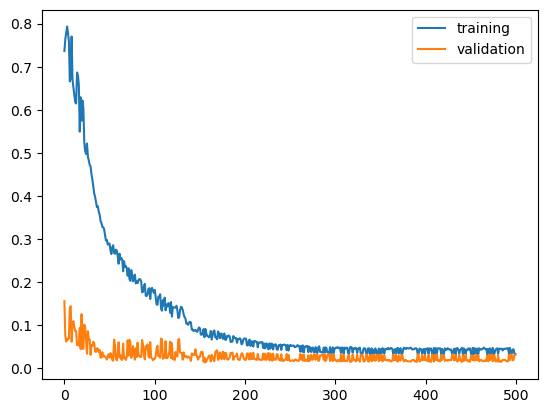

In [13]:
plt.plot(tr_loss, label='training')
plt.plot(val_loss, label='validation')
plt.legend()

In [51]:
import nannyml as nml

In [52]:
import pandas as pd 
from datetime import datetime

# creating a range of timestamps
timestamp_list = pd.date_range(datetime.today(), periods=6*7*24*60, freq='min').tolist()

In [70]:
ref_dataset = 'machine-1-1'

tmp_path = data_root + 'train/' + ref_dataset + '.txt'
tmp_df = pd.read_csv(tmp_path, header=None)
tmp_df.columns = sel_feats

ref_num = 5000 #len(tmp_df)
ref_data = tmp_df[sel_feats].iloc[:ref_num]
ref_data['timestamp'] = ref_data.index #timestamp_list[:len(ref_data)] #ref_data.index

In [71]:
ana_dataset = 'machine-1-1' #['machine-1-1', 'machine-2-1', 'machine-3-2', 'machine-3-7']

tmp_path = data_root + 'train/' + ana_dataset + '.txt'
tmp_df = pd.read_csv(tmp_path, header=None)
tmp_df.columns = sel_feats
# ana_num = len(tmp_df)

# ana_data_list = []
# idx = 0
# while idx < len(tmp_df): 
#     sel_df = tmp_df[sel_feats].iloc[idx:idx+ana_num] #[idx:idx+ana_num]
#     sel_df['timestamp'] = sel_df.index #timestamp_list[idx:idx+ana_num] #sel_df.index
#     ana_data_list.append(sel_df)
#     idx += ana_num

ana_data_list = [tmp_df[sel_feats].iloc[5000:]]

In [72]:
drdc = nml.DataReconstructionDriftCalculator(
    column_names=sel_feats,
    chunk_number = 30, 
    # timestamp_column_name='timestamp'
)

drdc.fit(ref_data)
multivariate_data_drift = drdc.calculate(ana_data_list[0])

In [73]:
figure = multivariate_data_drift.plot()

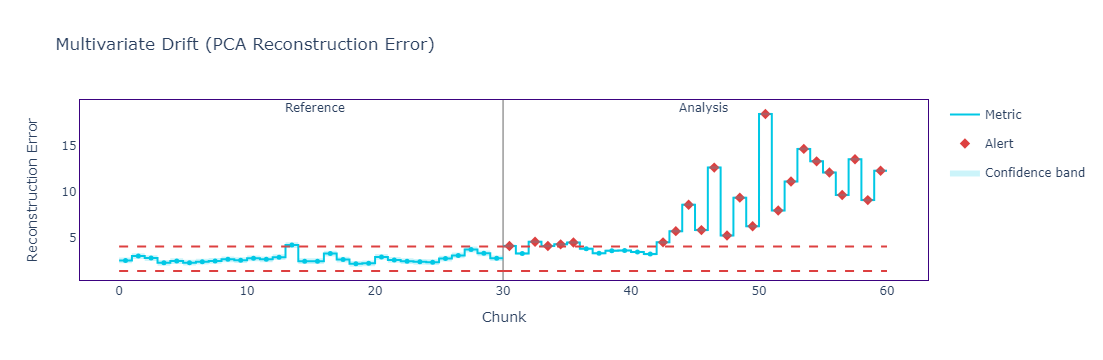

In [74]:
figure